<a href="https://colab.research.google.com/github/verach3n/DD2360HT22/blob/main/ex_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **LU Decomposition**

In [54]:
%cd '/content/drive/MyDrive/ColabNotebooks/DD2360/project/lud/cuda'
!ls
!make clean
!make KERNEL_DIM="-DRD_WG_SIZE_0=64"

rm -f lud_cuda ../common/common.o lud.o lud_kernel.o *.linkinfo
nvcc -DRD_WG_SIZE_0=64 -I../common -O3 -use_fast_math -arch=sm_75 -lm -lcublas  -DGPU_TIMER  -o ../common/common.o -c ../common/common.c
../common/common.c: In function ‘create_matrix_from_file’:
../common/common.c:51:3: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
   fscanf(fp, "%d\n", &size);
   ^~~~~~~~~~~~~~~~~~~~~~~~~
../common/common.c:61:11: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
           fscanf(fp, "%f ", m+i*size+j);
           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nvcc -DRD_WG_SIZE_0=64 -I../common -O3 -use_fast_math -arch=sm_75 -lm -lcublas  -DGPU_TIMER  -o lud.o -c lud.cu
nvcc -DRD_WG_SIZE_0=64 -I../common -O3 -use_fast_math -arch=sm_75 -lm -lcublas  -DGPU_TIMER  -o lud_kernel.o -c lud_kernel.cu
nvcc -I../common -O3 -use_fast_math -arch=sm_75 -lm -lcublas  -o lud_cuda  ../common/common.o lud.o

In [55]:
!ls
!./lud_cuda -s 20000

lud.cu	  lud_kernel.cu  lud.o	   managedm  README
lud_cuda  lud_kernel.o	 Makefile  pinnedm   regular
WG size of kernel = 64 X 64
Generate input matrix internally, size =2
Creating matrix internally size=2
Time consumed(ms): 80.117000
10.000000 9.990005 
9.990005 10.000000 


# **Gaussian**

## 1) Managed memory

In [47]:
%cd '/content/drive/MyDrive/ColabNotebooks/DD2360/project/gaussian/managedm'
!ls
!make
!cp gaussian_managedm ../

/content/drive/MyDrive/ColabNotebooks/DD2360/project/gaussian/managedm
datatrans_managedm.txt	gaussian_manegedm.cu  mdt2_output.txt
gaussian.cu		Makefile	      mdt3_output.txt
gaussian_managedm	mdt1_output.txt       run.sh
/usr/local/cuda/bin/nvcc   gaussian.cu -o gaussian_managedm -I/usr/local/cuda/include -L/usr/local/cuda/lib64 -lcublas
gaussian.cu(92): warning: variable "verbose" was set but never used



In [25]:
!./gaussian_managedm -s 3

WG size of kernel 1 = 512, WG size of kernel 2= 4 X 4
Create matrix internally in parse, size = 3 

Time total (including memory transfers)	0.000102 sec
src/tcmalloc.cc:283] Attempt to free invalid pointer 0x7f791a001000 


In [ ]:
!bash ./run.sh

In [48]:
!grep 'cudaMallocManaged' datatrans_managedm.txt > mdt1_output.txt

In [49]:
!awk '{print $2}' mdt1_output.txt > mdt2_output.txt

In [50]:
!sed 's/[a-zA-Z]//g' mdt2_output.txt > mdt3_output.txt

In [52]:
!cp mdt3_output.txt ../

## 2) Pinned memory

In [53]:
%cd '/content/drive/MyDrive/ColabNotebooks/DD2360/project/gaussian/pinnedm'
!ls
!make
!cp gaussian_pinnedm ../

/content/drive/MyDrive/ColabNotebooks/DD2360/project/gaussian/pinnedm
datatrans_pinnedm.txt  gaussian_pinnedm.cu  pdt2_output.txt
gaussian.cu	       Makefile		    pdt3_output.txt
gaussian_pinnedm       pdt1_output.txt	    run.sh
/usr/local/cuda/bin/nvcc   gaussian.cu -o gaussian_pinnedm -I/usr/local/cuda/include -L/usr/local/cuda/lib64 -lcublas
gaussian.cu(93): warning: variable "verbose" was set but never used



In [36]:
!./gaussian_pinnedm -s 3

WG size of kernel 1 = 512, WG size of kernel 2= 4 X 4
Create matrix internally in parse, size = 3 

Time total (including memory transfers)	0.077048 sec


In [ ]:
!bash ./run.sh

In [30]:
!grep 'cudaMallocHost' datatrans_pinnedm.txt > pdt1_output.txt

In [32]:
!awk '{print $2}' pdt1_output.txt > pdt2_output.txt

In [33]:
!sed 's/[a-zA-Z]//g' pdt2_output.txt > pdt3_output.txt

In [54]:
!cp pdt3_output.txt ../

## 3) Regular memory

In [55]:
%cd '/content/drive/MyDrive/ColabNotebooks/DD2360/project/gaussian/regular'
!ls
!make
!cp gaussian_regularm ../

/content/drive/MyDrive/ColabNotebooks/DD2360/project/gaussian/regular
datatrans_regular.txt  Makefile		rdt2_output.txt
gaussian.cu	       mdt1_output.txt	rdt3_output.txt
gaussian_regularm      rdt1_output.txt	run.sh
/usr/local/cuda/bin/nvcc   gaussian.cu -o gaussian_regularm -I/usr/local/cuda/include -L/usr/local/cuda/lib64 -lcublas
gaussian.cu(93): warning: variable "verbose" was set but never used



In [39]:
!./gaussian_regularm -s 3

WG size of kernel 1 = 512, WG size of kernel 2= 4 X 4
Create matrix internally in parse, size = 3 

Time total (including memory transfers)	0.076485 sec


In [ ]:
!bash ./run.sh

In [42]:
!grep 'cudaMalloc' datatrans_regular.txt > rdt1_output.txt

In [43]:
!awk '{print $2}' rdt1_output.txt > rdt2_output.txt

In [44]:
!sed 's/[a-zA-Z]//g' rdt2_output.txt > rdt3_output.txt

In [56]:
!cp rdt3_output.txt ../

# Plot

## 1. Data Transferring Time of Gaussian with different memory types

In [3]:
%cd '/content/drive/MyDrive/ColabNotebooks/DD2360/project/gaussian'

/content/drive/MyDrive/ColabNotebooks/DD2360/project/gaussian


[425.06, 544.5, 408.39, 425.27, 535.33, 381.61, 380.63, 372.63, 507.24, 429.78, 395.39, 354.42, 519.98, 525.38, 535.2, 431.87, 398.84, 525.15, 309.02, 480.85, 454.55, 431.54, 312.01, 315.04, 385.04, 307.12, 307.32, 311.08, 317.5, 316.18]
[290.4, 294.79, 297.12, 292.07, 283.23, 278.33, 300.59, 284.76, 349.68, 283.7, 349.31, 286.84, 286.62, 300.09, 282.71, 292.04, 287.0, 282.52, 298.03, 291.87, 293.24, 293.17, 287.76, 494.77, 287.95, 291.24, 281.15, 296.38, 281.33, 287.57]
[293.98, 282.57, 280.3, 289.18, 281.61, 293.94, 300.09, 282.36, 280.92, 292.11, 288.36, 293.86, 297.64, 284.65, 286.09, 295.42, 319.67, 304.38, 371.95, 295.88, 281.15, 289.58, 289.17, 278.99, 313.9, 295.98, 295.11, 303.48, 287.59, 290.76]
[11.536641991587544, 11.63195217139187, 11.718963548381499, 11.799006256055035, 11.873114228208758, 11.94210709969571, 12.00664562083328, 12.067270242649714, 12.124428656489663, 12.17849587775994, 12.22978917214749, 12.278579336316922, 12.325099351951815, 12.369551114522649, 12.412110

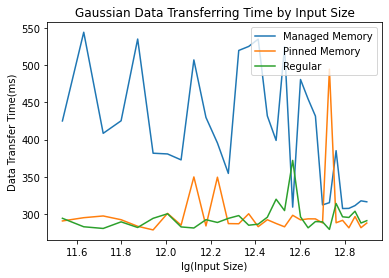

In [9]:
import matplotlib.pyplot as plt
import math

with open("mdt3_output.txt", "r") as f: 
  lines = f.readlines()
  data1 = [float(line.strip()) for line in lines]

cudaMallocManaged = []
for i in range(0,30):
  cudaMallocManaged.append(data1[i])
print(cudaMallocManaged)

with open("pdt3_output.txt", "r") as f: 
  lines = f.readlines()
  data2 = [float(line.strip()) for line in lines]

cudaMallocHost = []
for i in range(0,30):
  cudaMallocHost.append(data2[i])
print(cudaMallocHost)

with open("rdt3_output.txt", "r") as f: 
  lines = f.readlines()
  data3 = [float(line.strip()) for line in lines]

cudaMalloc = []
for i in range(0,30):
  cudaMalloc.append(data3[i])
print(cudaMalloc)

x = []
for i in range(102400, 409600, 10240):
  x.append(math.log(i))
print(x)

plt.plot(x, cudaMallocManaged, label='Managed Memory')
plt.plot(x, cudaMallocHost, label='Pinned Memory')
plt.plot(x, cudaMalloc, label='Regular')

plt.xlabel('lg(Input Size)')
plt.ylabel('Data Transfer Time(ms)')
plt.legend(loc='upper right')
plt.title("Gaussian Data Transferring Time by Input Size")
plt.show()